## Ensemble Technique Project
### Github: https://github.com/cmelende/EnsembleTechniqueProject.git
### Cory Melendez
### 7/31/2022

In [137]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [138]:
bankData = pd.read_csv('bank-full.csv')
bankData.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

### 1. Univariate Analysis

### a. 

### Description of indipendent variables


In [139]:
class UniVariateAnalysis:

    def __init__(self, df, columnName):
        self.columnName = columnName
        self.dataframe = df
        self.series = df[columnName]
    
    def get_q1(self):
        return self.series.quantile(.25)

    def get_q2(self):
        return self.series.quantile(.5)

    def get_q3(self):
        return self.series.quantile(.75)

    def get_q4(self):
        return self.series.quantile(1)

    def get_iqr(self):
        return self.get_q3() - self.get_q1()

    def get_min(self):
        return self.dataframe[self.columnName].min()

    def get_median(self):
        return self.dataframe[self.columnName].median()

    def get_max(self):
        return self.dataframe[self.columnName].max()

    def get_data_type(self):
        return self.dataframe[self.columnName].dtypes

    def get_lower_outlier_rows(self):
        return self.dataframe.loc[(self.dataframe[self.columnName] < self.get_lower_whisker_value())]

    def get_lower_whisker_value(self):
        return self.get_q1() - ((3/2) * self.get_iqr())

    def get_higher_outlier_rows(self):
        return self.dataframe.loc[(self.dataframe[self.columnName] > self.get_higher_whisker_value())]

    def get_higher_whisker_value(self):
        return self.get_q3() + ( (3/2) * self.get_iqr())

    def get_std(self):
        return self.series.std()

    def get_mean(self):
        return self.series.mean()

In [140]:
class UniVariateReport: 
    def __init__(self, uniVariateAnalysis):
        self.analysis = uniVariateAnalysis
    
    def print_quartiles(self):
        print("Q1: " , self.analysis.get_q1())
        print("Q2: ", self.analysis.get_q2())
        print("Q3: ", self.analysis.get_q3())
        print("Q4: ", self.analysis.get_q4())
        print("Mean: ", self.analysis.get_mean())
        print("Min: ", self.analysis.get_min())
        print("Median: ", self.analysis.get_median())
        print("Max: ", self.analysis.get_max())
    
    def print_whiskers(self):
        print("Top whisker: ", self.analysis.get_higher_whisker_value())
        print("Bottom whisker: ", self.analysis.get_lower_whisker_value())

    def print_data_type(self):
        print("Data type: ", self.analysis.get_data_type())

    def print_value_range(self):
        print(f'Range of values: ({self.analysis.get_min()}, {self.analysis.get_max()})')

    def print_std(self):
        print("Standard deviation: ", self.analysis.get_std())

    def print_report(self):
        self.print_data_type()
        self.print_value_range()
        self.print_std()
        self.print_quartiles()
        self.print_whiskers()

### Age
* meaning - Age of person, possibly a good indicator of target variable
* analysis - Distribution of the data seems to indicate that most of the people in the dataset are 'younger' to middle aged.
* missing values - No missing values, we can probably safely asssume that anyone over the age of 18 is a valid customer
* outliers - quite a few rows that are outside of the top whisker but no values below the bottom whisker. 
* Data treatment - Getting rows with outliers in age may be a good choice here just due to the fact that older people may not be good candidates for investing. Usually people in retirement have already invested where they could and rely on their money being liquid in order to continue paying for essentials.

In [141]:
ageAnalysis = UniVariateAnalysis(bankData, 'age')
ageAnalysisReport = UniVariateReport(ageAnalysis)
ageAnalysisReport.print_report()

Data type:  int64
Range of values: (18, 95)
Standard deviation:  10.61876204097542
Q1:  33.0
Q2:  39.0
Q3:  48.0
Q4:  95.0
Mean:  40.93621021432837
Min:  18
Median:  39.0
Max:  95
Top whisker:  70.5
Bottom whisker:  10.5


In [142]:
ageAnalysis.get_higher_outlier_rows()

age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no   no   
45208   72  retired   married  secondary      no     5715      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
29158  telephone    2   feb       912         1     -1         0  unknown   
29261   cellular    2   feb       294         1     -1         0  unknown   
29263   cellular    2   feb       149         1     -1         0  unknown   
29322   cellular    2   feb       283         2     -1         0  unknown   
29865   cellular    4   feb       136         3     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45163   cellular    9   nov       379         2     92         3  failure   
45191   cellular   16   nov       262         1    183         1  failure   
45204   cellular   17   nov       300         1     40         8  failure   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   

      Target  
29158     no  
29261     no  
29263     no  
29322     no  
29865    yes  
...      ...  
45163     no  
45191    yes  
45204    yes  
45207    yes  
45208    yes  

[487 rows x 17 columns]

In [143]:
ageAnalysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

In [144]:
bankData.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

<AxesSubplot:xlabel='age'>

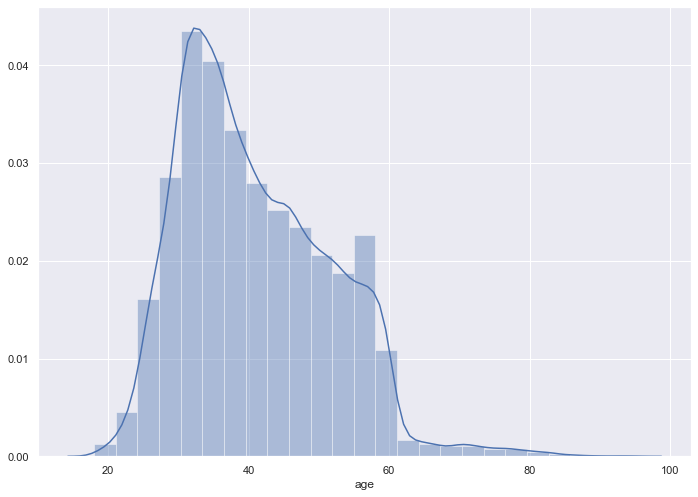

In [145]:
sns.distplot(bankData['age'], bins=25)

<AxesSubplot:xlabel='age'>

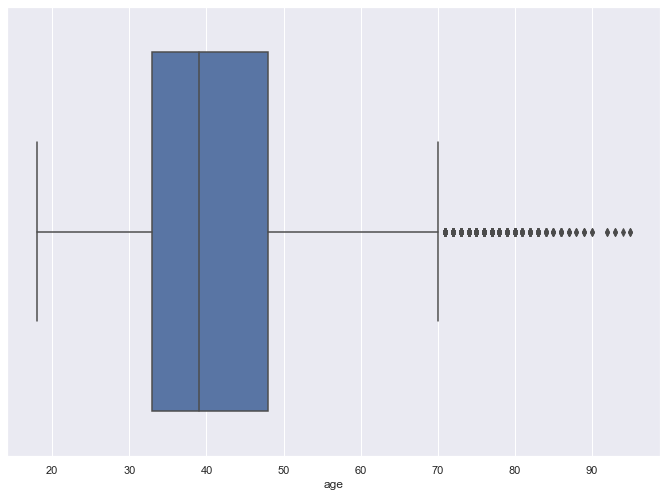

In [146]:
sns.boxplot(bankData['age'])

In [147]:
#Bad data search
bankData.loc[(bankData['age'] < 18)]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

### Job
* meaning - Job of person, categorical variable, has 12 distinct values 
* analysis - luckily there isnt many 'unknown' job type occurances. most of the jobs seem sto be combination of managment, technician, and blue collar worker. Probably a really good indicator of target variable. Since we are working from bank data, money will play a large role in target variable (whatever it may represent)
* missing values - 'unknown' may be a missing value 
* outliers - categorical variable - so we are not easily able to determine any outliers without context
* Datatype: object
* range - ['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student']
* data treatment: The 'unknown' value here may pose the greatest challenge for this column, we may want to remove these rows but we may not just because it could be the customer's unwillingness to share that they are unemployed so it may be a good indicator that they would not be a good candidate for term deposit subscription. We will want to convert the column to dummy variables



In [148]:
bankData['job'].unique().size
bankData['job'].dtypes

dtype('O')

In [239]:
bankData['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<AxesSubplot:xlabel='job', ylabel='count'>

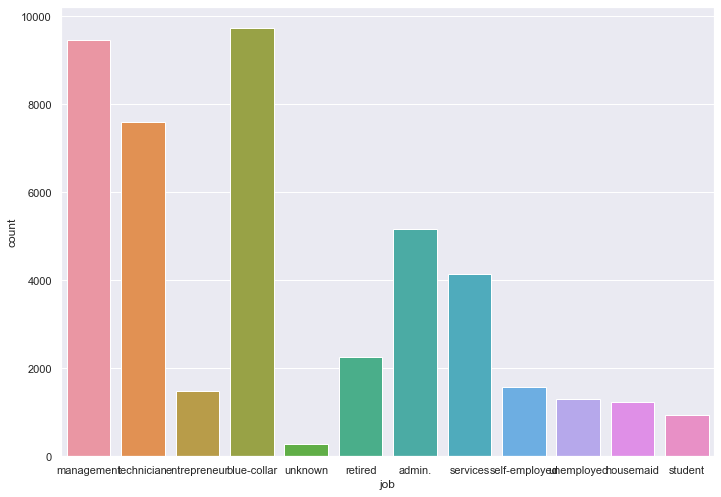

In [149]:
sns.countplot(x="job", data=bankData)

### Marital
* meaning - Whether or not the person is married
* analysis - Probably also a good indicator since married people may or may not have kids which cost money. Or they may have no kids, in which case households with two incomes would play a large factor in determining the target variable. Divorced people will also be a good candidate for predicting target variable since 1) the person may have to pay alimony and/or child support or 2) the person may be receiving alimony or child support. It would be beneficial for the bank to provide this info so we can better predict which describes the person best. The distribution is mostly concentrated over the married value, with divorced being the least likely.
* missing values - no missing values, the distinct value in the series is a logical value
* outliers - Categorical value, no outliers
* range - ['married','single','divorce']
* data type - object
* data treatment - Dont see the need to remove any rows, there are no outliers and all the values are valid. We will want to convert the column to dummy variables

In [150]:
bankData['marital'].dtypes

dtype('O')

In [151]:
bankData['marital'].unique().size

3

In [152]:
bankData['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

<AxesSubplot:xlabel='marital', ylabel='count'>

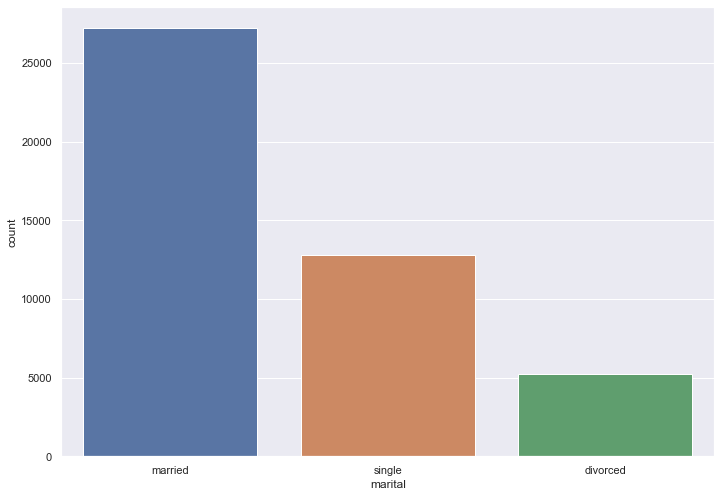

In [157]:
sns.countplot(x="marital", data=bankData)

### Education
* meaning - Highest education of the bank customer
* analysis - distribution is concentrated among the tertiary and secondary values. Since higher education can result in better understanding of how loans, interest, etc work, then this is a good candidate for predicting our target variable
* missing values - 'unknown' could be considered a missing value, but most likely should be kept in
* outliers - categorical value, so no outliers
* data type - object
* range - ['tertiary', 'secondary', 'unknown', 'primary']
* data treatment - althought we could consider the 'unknown' value as missing, we probably shouldnt, like job this may be the customer not wanting to share personal information on their education level since it may be lower than average. Therefore we would probably want to keep the rows with this value in since education level could largely drive whether or not they would be willing and able to understand the importance of term deposits. We will want to convert the column to dummy variables

In [159]:
bankData['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [160]:
bankData['education'].unique().size

4

<AxesSubplot:xlabel='education', ylabel='count'>

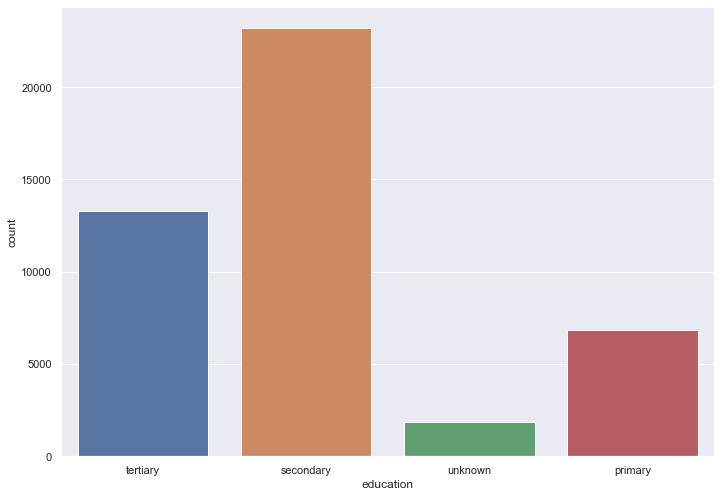

In [158]:
sns.countplot(x="education", data=bankData)

### Default
* meaning - This column could mean whether or not the customer has defaulted on their loan. This is basically a bool column (or int column with values in (0,1))
* analysis - Very good predictor for whether or not the customer will subscribe to a term deposit. Since people that do not default on their loan usually take smart measures to do so, they are more likely to be aware of their financial health and can predict long term if they are able to pay back a loan. This skill of predicting if they can pay back a loan can result in people that do not default be more willing to subscribe to term deposit. But since most people do not default on their loan, it may be the case that its a better predictor of people that will not subscribe to term deposit.
* missing values - no missing values
* outliers - categorical variable - no outliers
* data type - object
* range - ['yes','no']
* data treatment - no data treatment needed since there are no unusual values or missing values.  We will want to convert the column to dummy variables or conver the yes/no to 1/0, respectively

<AxesSubplot:xlabel='default', ylabel='count'>

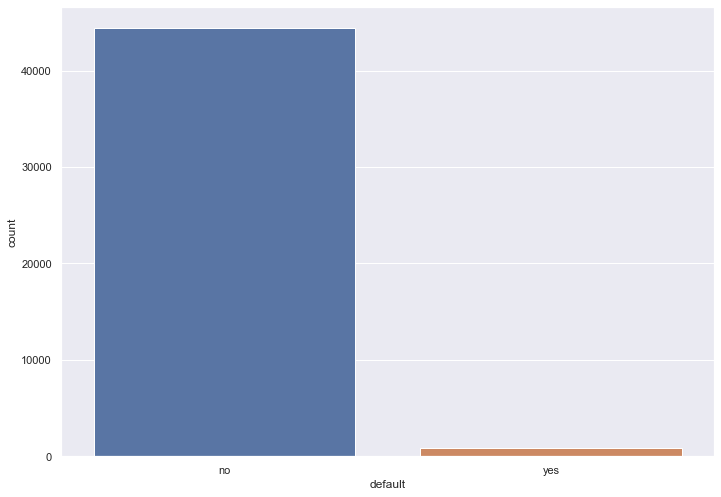

In [162]:
sns.countplot(x="default", data=bankData)

In [161]:
bankData['default'].unique()

array(['no', 'yes'], dtype=object)

### Balance
* meaning - Current balance of customer's bank account
* analysis - This probably has one of the greatest potentials to be a predictor of the target variable. Money sitting in a bank account that is not being spent will be lost due to inflation and does not do the customer any good to have that money not earning any type of interest via a term deposit. Most people seem to have around 0-10k money in the bank which seems congruent to the middle class
* missing values - No missing values.
* outliers - Plenty of outliers, though I am curious if I should get rid of the rows - logically, the outliers here are the super rich, if by some chance a super rich person becomes a member at the bank then I would certainly want to almost 100% aim to market term depositing towards the individual. The cost of getting a FN for a high income individual would be large - seems like a lot of potential revenue loss. 
* data treatment - Will probably keep the higher outliers in since we do want the  model to predict that higher income individuals will be much more likely or much less likely to subscribe to term deposits. The lower outliers though we may want to take out just because there are so few of them and they seem to indicate that the customer owes money to the bank, which in reality shouldnt be possible to a large degree like we see in the data.

In [169]:
balance_analysis = UniVariateAnalysis(bankData, 'balance')
balance_analysis_report = UniVariateReport(balance_analysis)
balance_analysis_report.print_report()

Data type:  int64
Range of values: (-8019, 102127)
Standard deviation:  3044.765829168518
Q1:  72.0
Q2:  448.0
Q3:  1428.0
Q4:  102127.0
Mean:  1362.2720576850766
Min:  -8019
Median:  448.0
Max:  102127
Top whisker:  3462.0
Bottom whisker:  -1962.0


<AxesSubplot:xlabel='balance'>

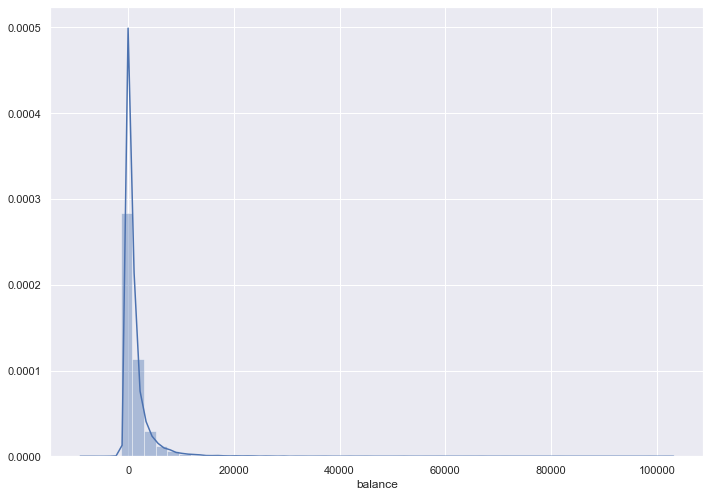

In [178]:
sns.distplot(bankData['balance'], bins=50)

<AxesSubplot:xlabel='balance'>

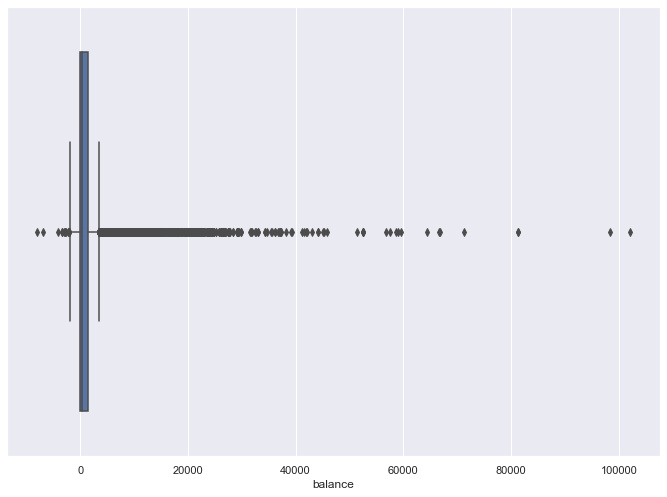

In [171]:
sns.boxplot(bankData['balance'])

In [173]:
balance_analysis.get_higher_outlier_rows()


age          job   marital  education default  balance housing loan  \
34      51   management   married   tertiary      no    10635     yes   no   
65      51   management   married   tertiary      no     6530     yes   no   
69      35  blue-collar    single  secondary      no    12223     yes  yes   
70      57  blue-collar   married  secondary      no     5935     yes  yes   
186     40     services  divorced    unknown      no     4384     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45164   35     services   married   tertiary      no     4655      no   no   
45181   46  blue-collar   married  secondary      no     6879      no   no   
45185   60     services   married   tertiary      no     4256     yes   no   
45191   75      retired  divorced   tertiary      no     3810     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
34      unknown    5   may       336         1     -1         0  unknown   
65      unknown    5   may        91         1     -1         0  unknown   
69      unknown    5   may       177         1     -1         0  unknown   
70      unknown    5   may       258         1     -1         0  unknown   
186     unknown    5   may       315         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
45164  cellular    9   nov       111         2     -1         0  unknown   
45181  cellular   15   nov        74         2    118         3  failure   
45185  cellular   16   nov       200         1     92         4  success   
45191  cellular   16   nov       262         1    183         1  failure   
45208  cellular   17   nov      1127         5    184         3  success   

      Target  
34        no  
65        no  
69        no  
70        no  
186       no  
...      ...  
45164     no  
45181     no  
45185    yes  
45191    yes  
45208    yes  

[4712 rows x 17 columns]

In [175]:
balance_analysis.get_lower_outlier_rows()

age            job   marital  education default  balance housing loan  \
1896    57  self-employed   married   tertiary     yes    -3313     yes  yes   
7413    43     management   married   tertiary     yes    -3372     yes   no   
7756    49     management  divorced   tertiary      no    -2049     yes   no   
11655   56     management  divorced   tertiary     yes    -1968      no   no   
12909   26    blue-collar    single  secondary     yes    -8019      no  yes   
13687   38    blue-collar  divorced  secondary      no    -2093     yes  yes   
13708   49   entrepreneur   married  secondary      no    -1965      no  yes   
14434   51     management  divorced   tertiary      no    -2282     yes  yes   
15682   49     management   married   tertiary     yes    -6847      no  yes   
17159   51   entrepreneur   married  secondary     yes    -2082      no  yes   
18573   40     technician   married   tertiary     yes    -2827     yes  yes   
20317   35     management    single   tertiary     yes    -1980     yes  yes   
25119   49    blue-collar    single    primary     yes    -2604     yes   no   
25240   43       services   married    primary      no    -2122     yes  yes   
31509   52     management   married   tertiary      no    -2712     yes  yes   
32713   39  self-employed   married   tertiary      no    -3058     yes  yes   
38736   60     management  divorced   tertiary      no    -4057     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
1896     unknown    9   may       153         1     -1         0  unknown   
7413     unknown   29   may       386         2     -1         0  unknown   
7756     unknown   30   may       169         3     -1         0  unknown   
11655    unknown   20   jun        60         3     -1         0  unknown   
12909   cellular    7   jul       299         3     -1         0  unknown   
13687    unknown    9   jul       120         3     -1         0  unknown   
13708  telephone   10   jul       317         2     -1         0  unknown   
14434   cellular   14   jul       301         6     -1         0  unknown   
15682   cellular   21   jul       206         1     -1         0  unknown   
17159   cellular   28   jul       123         6     -1         0  unknown   
18573   cellular   31   jul       843         1     -1         0  unknown   
20317   cellular   11   aug       227         1     -1         0  unknown   
25119   cellular   18   nov       142         1     -1         0  unknown   
25240   cellular   18   nov       141         3     -1         0  unknown   
31509   cellular    2   apr       253         1     -1         0  unknown   
32713   cellular   17   apr       882         3     -1         0  unknown   
38736   cellular   18   may       242         6     -1         0  unknown   

      Target  
1896      no  
7413      no  
7756      no  
11655     no  
12909     no  
13687     no  
13708     no  
14434     no  
15682     no  
17159     no  
18573     no  
20317     no  
25119     no  
25240     no  
31509     no  
32713    yes  
38736     no

In [177]:
bankData['balance'].isnull().values.any()

False

### Housing
* meaning - Housing loan status, I think this would be a very good predictor of our target variable since people with outstanding debts are probably less likely to invest if they dont have a high balance
* analysis - most people do have a housing loan - but the amount of people who do not is also very high, keeping this variable to predict the likelihood of term deposit is likely to help our model but may work in conjunction with the values of the other columsn
* missing values - no missing values
* outliers - categorical values - no outliers
* data type - object
* range - ['yes','no']
* data treatment - no data treatment, all values are valid and there are no outliers.  We will want to convert the column to dummy variables or conver the yes/no to 1/0, respectively

<AxesSubplot:xlabel='housing', ylabel='count'>

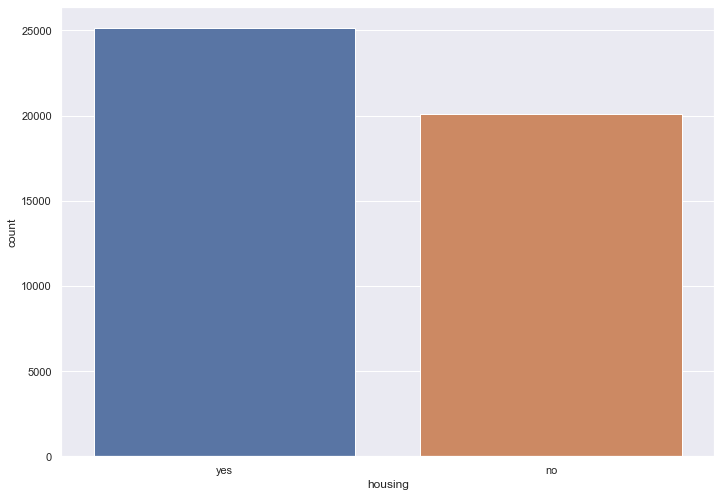

In [179]:
sns.countplot(x="housing", data=bankData)

### Loan
* meaning - Whether or not the customer has a personal loan
* analysis - By a great margin, more people do not have a personal loan. This is probably going to be a good indicator of whether or not the person will subscribe to term deposit, since like some of our other columns, the more likely you are to take out a personal loan, the less likely you are to not have much disposable income to invest in a term deposit. 
* missing values - none
* outliers - categorical value, no outliers.
* data type - object
* range - ['yes','no']
* data treatment - No removal of rows needed since all values are valid and there are not outliers, since theyre categorical - We will want to convert the column to dummy variables or conver the yes/no to 1/0, respectively

<AxesSubplot:xlabel='loan', ylabel='count'>

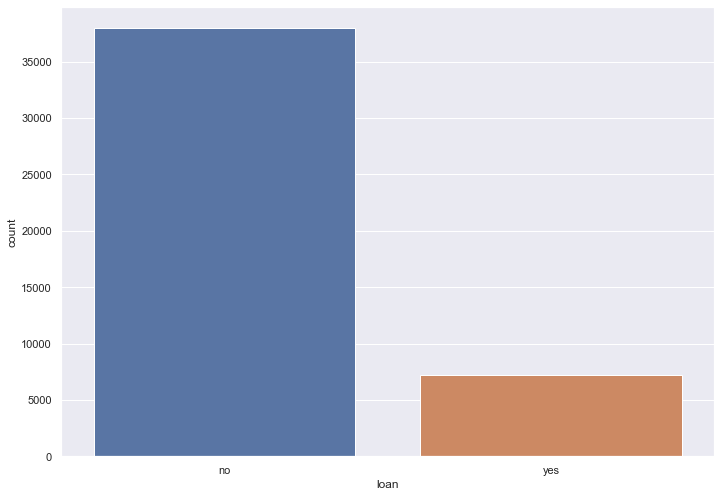

In [180]:
sns.countplot(x="loan", data=bankData)

### Contact
* meaning - The type of communication that the customer has set up with the bank
* analysis - A majority of people have cellular contact - this could actually be a really good indicator of whether or not the marketing team should market to this customer. Since customers with an 'unknown' contact would be difficult to communicate with, it may not be worth it to send out marketing material to those customers since we would either not have a way to do so or the way we do so would be an avenue which is not likely to reach the customer (flyer, mail, etc). Doing so through a text may be less intrusive and not cause any customers to be upset, while telephone may cause people to become upset at the calls they are getting from the bank, they are more intrusive.
* missing values - None, i will assume that 'unknown' can be intrepreted as 'no communication'
* outliers - categorical values - no outliers
* range - ['unknown', 'cellular', 'telephone']
* data type - object
* data treatment - No removing rows, even the 'unknown' value seems important so we will not want to remove that. Will want to make these columns dummy variables

<AxesSubplot:xlabel='contact', ylabel='count'>

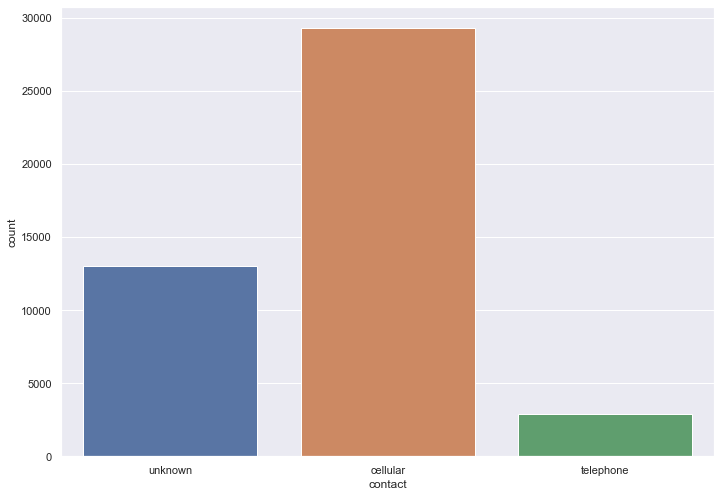

In [182]:
sns.countplot(x="contact", data=bankData)

In [181]:
bankData['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

### Day
* meaning - In conjuction with month and duration, this represent the day of the month in which the customer was last contacted
* analysis - I dont think this has a very good potential to be a predictor of the target variable, at least on its own. However, in conjuction with the month,duration and contact columns, this may be a good predictor. In conjuction with those columns we can probably derive some meaning on how likely the person is to answer a call or text (maybe they are less likely on the weekend or a holiday or less likely to answer or respond if the bank recently contacted them already).
* missing values - None, looks like there are no values outside of 1 through 31 that would constitute a missing value
* outliers - No outlier rows, even if there were, outliers dont really make sense given the context of this column, there isnt really a day that is outside of the normal month that can be considered an outlier
* data treatment - no data treatment, all data is valid and logically it doesnt make sense to think of a certain day as an 'outlier', especially when that day is dependent on the month (ie, the day of  month A landed on a holiday but the same day value with month B did not)

In [187]:
day_analysis = UniVariateAnalysis(bankData, 'day')
day_analysis_report = UniVariateReport(ageAnalysis)
day_analysis_report.print_report()

Data type:  int64
Range of values: (1, 31)
Standard deviation:  8.322476153044592
Q1:  8.0
Q2:  16.0
Q3:  21.0
Q4:  31.0
Mean:  15.80641879188693
Min:  1
Median:  16.0
Max:  31
Top whisker:  40.5
Bottom whisker:  -11.5


In [188]:
day_analysis.get_higher_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

In [189]:
day_analysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

In [186]:
bankData['day'].isnull().values.any()

False

<AxesSubplot:xlabel='day', ylabel='count'>

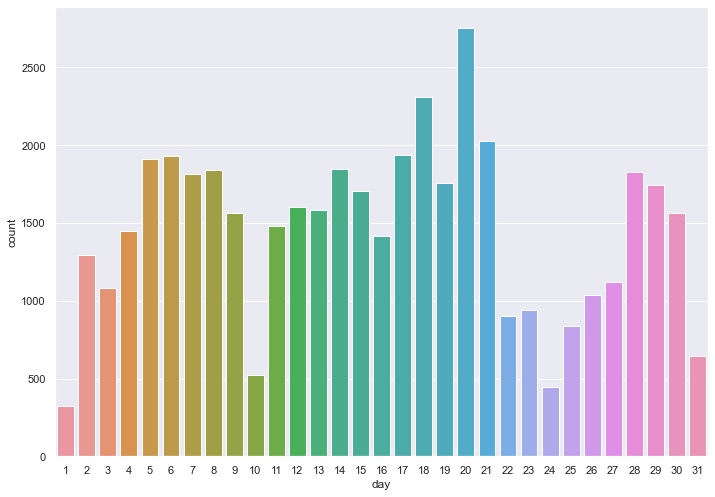

In [183]:
sns.countplot(x="day", data=bankData)

<AxesSubplot:xlabel='day'>

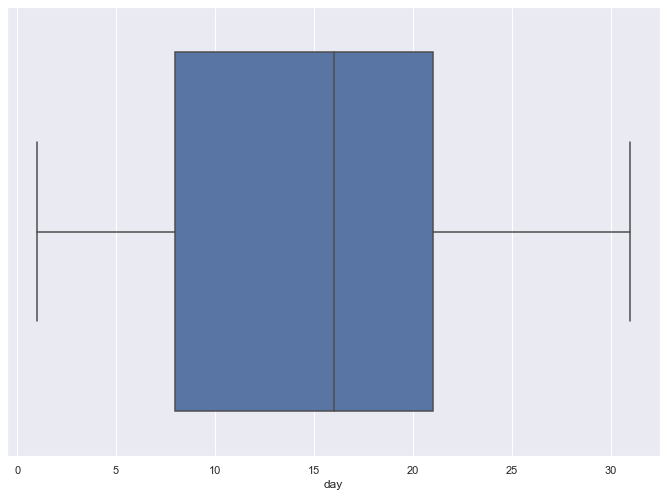

In [190]:
sns.boxplot(bankData['day'])


### Month
* meaning - The month in which last contact was made with the customer
* range - ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep']
* analysis - In conjuction with contact, day, & duration, this may be a good predictor otherwise probably not. We talked ealier about how day, this column, contact, & duration may be a good indicator and the information in these columns could derive some meaning for our model to predict our target variable.
* missing values - No missing values
* outliers - Categorical variable, no outliers
* data type - object
* data treatment - No data treatment, all values are valid and there are no outliers

<AxesSubplot:xlabel='month', ylabel='count'>

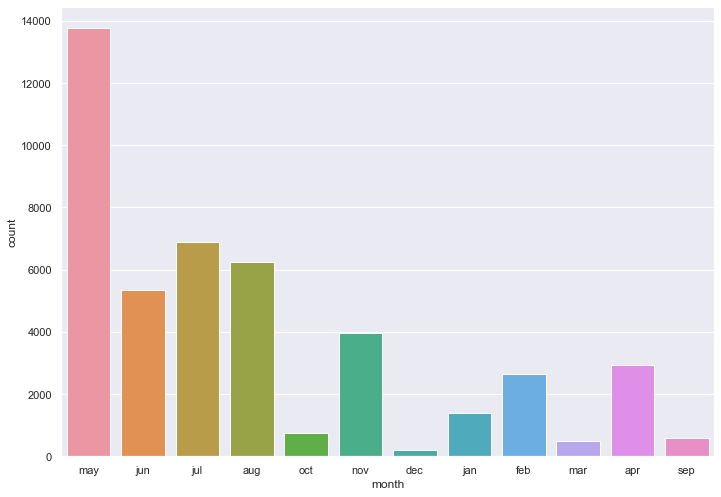

In [197]:
sns.countplot(x="month", data=bankData)

In [196]:
bankData['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

### Duration
* meaning - How long the last contact with the customer lasted
* analysis - This is probably a good predictor of our target variable. The last contact could be a good sign since it may have information on what was talked about. If the model can derive the range of time that resulted convincing the customer to subscribe to term deposits, then it would be a good predictor. With higher times, it either be that the customer wanted more information on term deposits or simply they changed the subject to ask another question. Or it could be that more time is equal to actually setting up a term deposit (depending on the laws that the bank is bound to, ie: the bank can subscribe customers to term deposits over the phone). 
* missing values - No missing values
* outliers - Yes quite a few outliers, which may indicate that the customer asked about another issue with the bank and talked about that instead of the term deposit. Which in that case would indicate that the person did not take the offer of a term deposit seriously and just used the opportunity to talk about some other bank related questions. Or we may want to include outliers if it really does take a long time for people to ask the questions they need answered in order to decide if they want to subscribe to term deposits. It could also indicate that they ask more questions because they are unsure if they want to and are on the fence about subscribing.


In [201]:
duration_analysis = UniVariateAnalysis(bankData, 'duration')
duration_analysis_report = UniVariateReport(duration_analysis)
duration_analysis_report.print_report()

Data type:  int64
Range of values: (0, 4918)
Standard deviation:  257.5278122651719
Q1:  103.0
Q2:  180.0
Q3:  319.0
Q4:  4918.0
Mean:  258.1630797814691
Min:  0
Median:  180.0
Max:  4918
Top whisker:  643.0
Bottom whisker:  -221.0


In [199]:
bankData['duration'].isnull().values.any()

False

<AxesSubplot:xlabel='duration'>

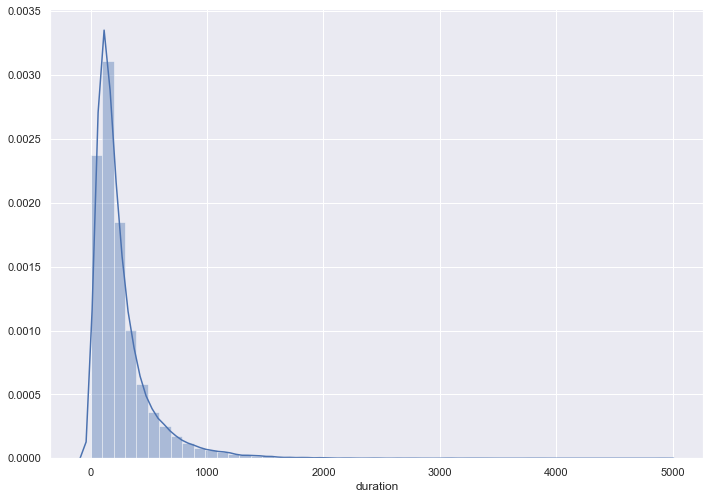

In [204]:
sns.distplot(bankData['duration'], bins=50)

<AxesSubplot:xlabel='duration'>

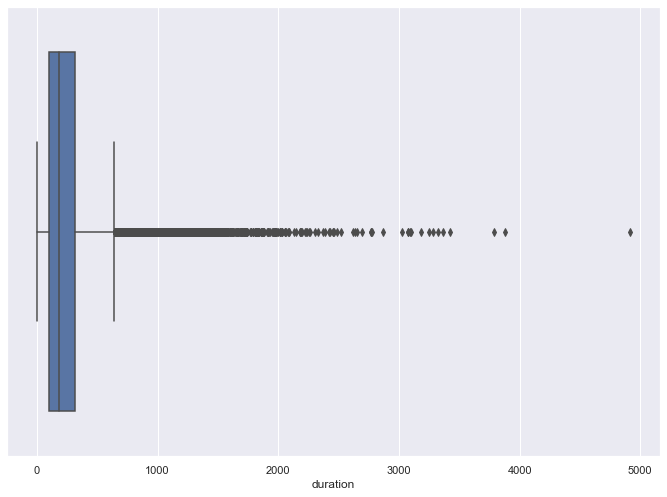

In [203]:
sns.boxplot(bankData['duration'])

In [200]:
duration_analysis.get_higher_outlier_rows()

age          job   marital  education default  balance housing loan  \
37      53   technician   married  secondary      no       -3      no   no   
43      54      retired   married  secondary      no      529     yes   no   
53      42       admin.    single  secondary      no      -76     yes   no   
59      46     services   married    primary      no      179     yes   no   
61      53   technician  divorced  secondary      no      989     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45124   27  blue-collar    single    primary      no      232     yes   no   
45199   34  blue-collar    single  secondary      no     1475     yes   no   
45200   38   technician   married  secondary      no      557     yes   no   
45206   51   technician   married   tertiary      no      825      no   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
37      unknown    5   may      1666         1     -1         0  unknown   
43      unknown    5   may      1492         1     -1         0  unknown   
53      unknown    5   may       787         1     -1         0  unknown   
59      unknown    5   may      1778         1     -1         0  unknown   
61      unknown    5   may       812         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
45124  cellular   26   oct       701         2     -1         0  unknown   
45199  cellular   16   nov      1166         3    530        12    other   
45200  cellular   16   nov      1556         4     -1         0  unknown   
45206  cellular   17   nov       977         3     -1         0  unknown   
45208  cellular   17   nov      1127         5    184         3  success   

      Target  
37        no  
43        no  
53        no  
59        no  
61        no  
...      ...  
45124    yes  
45199     no  
45200    yes  
45206    yes  
45208    yes  

[3235 rows x 17 columns]

In [202]:
duration_analysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

### Campaign
* meaning - Number of times that the customer has been contacted throughout the campaign
* analysis - Most of the people have been contacted very few times. This coupled with month, day, duration, and contact may be a very good predictor of the target variable since people may be more or less likely to subscribe to term deposits if they have been contacted a lot. Some customers may become frusterated and refuse to subscribe, while others may feel pressured and subscribe just to stop the communication. 
* missing values - none
* outliers - There are quite a few outliers beyond the top whisker,we may want to trim these just because the more contacts that we had with the customer it seems like the less likely they are to finally give in and subscribe. 

In [211]:
bankData['campaign'].isnull().values.any()

False

In [206]:
campaign_analysis = UniVariateAnalysis(bankData, 'campaign')
campaign_analysis_report = UniVariateReport(campaign_analysis)
campaign_analysis_report.print_report()

Data type:  int64
Range of values: (1, 63)
Standard deviation:  3.0980208832791694
Q1:  1.0
Q2:  2.0
Q3:  3.0
Q4:  63.0
Mean:  2.763840658246887
Min:  1
Median:  2.0
Max:  63
Top whisker:  6.0
Bottom whisker:  -2.0


In [212]:
campaign_analysis.get_higher_outlier_rows()

age            job  marital  education default  balance housing loan  \
758     59       services  married  secondary      no      307     yes  yes   
780     30         admin.  married  secondary      no        4      no   no   
906     27       services   single  secondary      no        0     yes   no   
1103    52     technician  married    unknown      no      133     yes   no   
1105    43         admin.  married   tertiary      no     1924     yes   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
44666   25     technician   single  secondary      no     1298      no   no   
44680   27  self-employed   single   tertiary      no      560      no   no   
44770   37       services   single   tertiary      no     1189      no   no   
44886   38     management  married   tertiary      no        0      no   no   
45056   64     management  married   tertiary      no     5112      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
758      unknown    6   may       250         7     -1         0  unknown   
780      unknown    7   may       172         8     -1         0  unknown   
906      unknown    7   may       388         7     -1         0  unknown   
1103     unknown    7   may       253         8     -1         0  unknown   
1105     unknown    7   may       244         7     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
44666   cellular    2   sep       206         7     94         2    other   
44680  telephone    3   sep       543         9    465         2  failure   
44770   cellular   13   sep       323         9    199         4    other   
44886   cellular   24   sep       246        12    197         6  failure   
45056  telephone   19   oct       898         7    137        11    other   

      Target  
758       no  
780       no  
906       no  
1103      no  
1105      no  
...      ...  
44666     no  
44680     no  
44770    yes  
44886     no  
45056    yes  

[3064 rows x 17 columns]

In [213]:
campaign_analysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

<AxesSubplot:xlabel='campaign'>

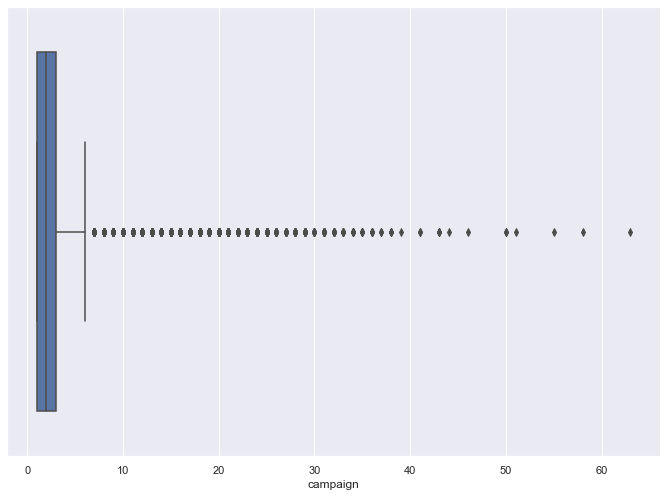

In [207]:
sns.boxplot(bankData['campaign'])

<AxesSubplot:xlabel='campaign'>

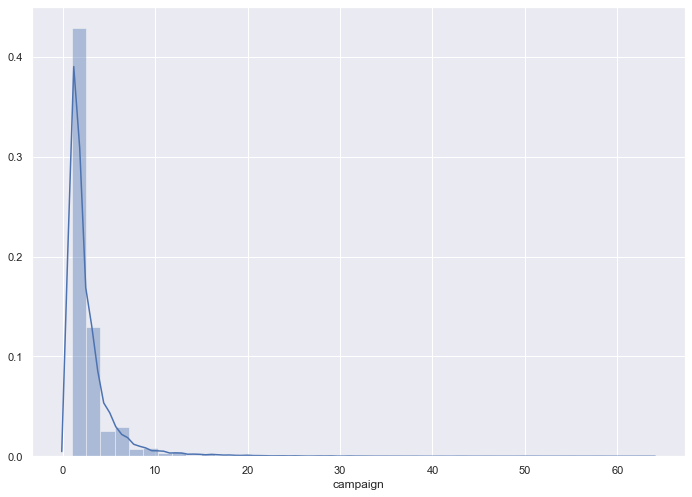

In [210]:
sns.distplot(bankData['campaign'], bins=40)


In [205]:
bankData['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

### Pdays
* meaning - The amount of days that have passed since the client was last contacted, -1 if the person has not been contacted or the amount of days exceeds 900 days
* analysis - A vast majority of people have not been contacted or the contact was greater than 900 days ago. May be a poor indicator since so many people have gone uncontacted, or may be a good indicator that if they were contacted just recently then they are probably not in a different financial positiion where they would want to change their mind and subscribe
* missing values - None, all values are between -1 and 871 
* outliers - Quite a few outliers on the higher side, however, I dont think that removing the outliers here will make benefit the model since we are likely to get rid of information regarding people that have refused to subscribe recently. There seems to be so many people that have not been contacted or were contacted more than 900 days ago that its categorizing most people that were contacted between 1 and 900 days as outliers. 

In [222]:
bankData['pdays'].isnull().values.any()

False

In [218]:
pdays_analysis = UniVariateAnalysis(bankData, 'pdays')
pdays_analysis_report = UniVariateReport(pdays_analysis)
pdays_analysis_report.print_report()

Data type:  int64
Range of values: (-1, 871)
Standard deviation:  100.12874599059835
Q1:  -1.0
Q2:  -1.0
Q3:  -1.0
Q4:  871.0
Mean:  40.19782796222158
Min:  -1
Median:  -1.0
Max:  871
Top whisker:  -1.0
Bottom whisker:  -1.0


In [227]:
pdays_analysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

In [226]:
pdays_analysis.get_higher_outlier_rows()

age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
24060  telephone   21   oct        39         1    151         3  failure   
24062  telephone   21   oct       519         1    166         1    other   
24064  telephone   21   oct       144         1     91         4  failure   
24072  telephone   22   oct        73         1     86         4    other   
24077  telephone   23   oct       140         1    143         3  failure   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45199   cellular   16   nov      1166         3    530        12    other   
45201   cellular   17   nov       226         1    184         4  success   
45204   cellular   17   nov       300         1     40         8  failure   
45208   cellular   17   nov      1127         5    184         3  success   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
24060     no  
24062    yes  
24064    yes  
24072     no  
24077    yes  
...      ...  
45199     no  
45201    yes  
45204    yes  
45208    yes  
45210     no  

[8257 rows x 17 columns]

In [221]:
bankData.loc[bankData['pdays'] < 0]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45203   cellular   17   nov       266         1     -1         0  unknown   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45209  telephone   17   nov       508         4     -1         0  unknown   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45203    yes  
45205    yes  
45206    yes  
45207    yes  
45209     no  

[36954 rows x 17 columns]

In [225]:
#invalid
bankData.loc[(bankData['pdays'] < -1) | bankData['pdays'] > 900]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

<AxesSubplot:xlabel='pdays'>

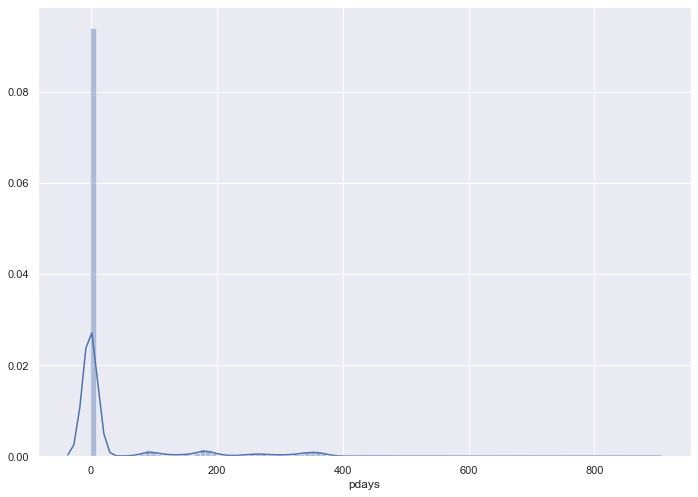

In [215]:
sns.distplot(bankData['pdays'], bins=100)

<AxesSubplot:xlabel='pdays'>

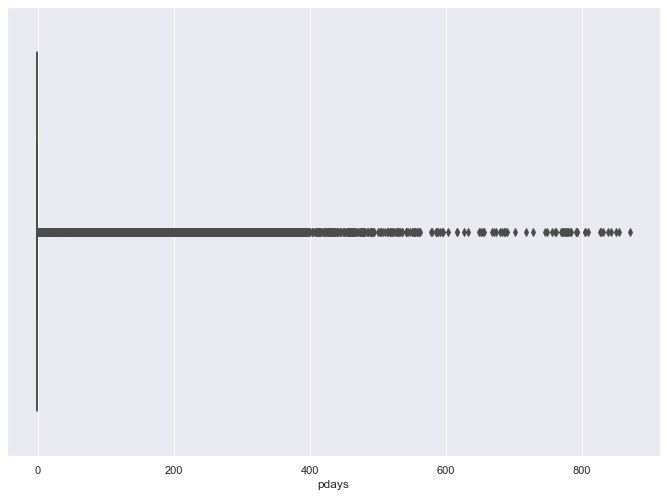

In [216]:
sns.boxplot(bankData['pdays'])

### Previous
* meaning - The amount of contacts that were made to this customer before the active campaign for the client
* analysis - Most of the customers were contacted about once before the active campaign. I predict that this will be a good predictor of the target variable since along with the other columsn, the model may gain insight on if they were not contacted or contacted few times the last time around, then it may be good to follow up with the customer again to see if their financial position has changed where they want to subscribe
* missing values - No missing values
* outliers - Quite a few outliers, may want to exclude these outliers since the bank may have annoyed them to the point where they no longer want to subscribe whether or not their financial status has changed where they would otherwise want to subscribe.

In [230]:
previous_analysis = UniVariateAnalysis(bankData, 'previous')
previous_analysis_report = UniVariateReport(previous_analysis)
previous_analysis_report.print_report()

Data type:  int64
Range of values: (0, 275)
Standard deviation:  2.3034410449312213
Q1:  0.0
Q2:  0.0
Q3:  0.0
Q4:  275.0
Mean:  0.5803233726305546
Min:  0
Median:  0.0
Max:  275
Top whisker:  0.0
Bottom whisker:  0.0


In [233]:
bankData['previous'].isnull().values.any()

False

<AxesSubplot:xlabel='previous'>

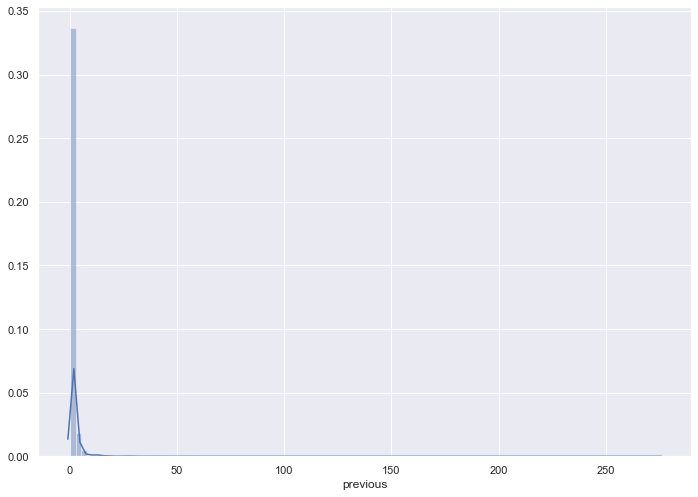

In [232]:
sns.distplot(bankData['previous'], bins=100)

<AxesSubplot:xlabel='previous'>

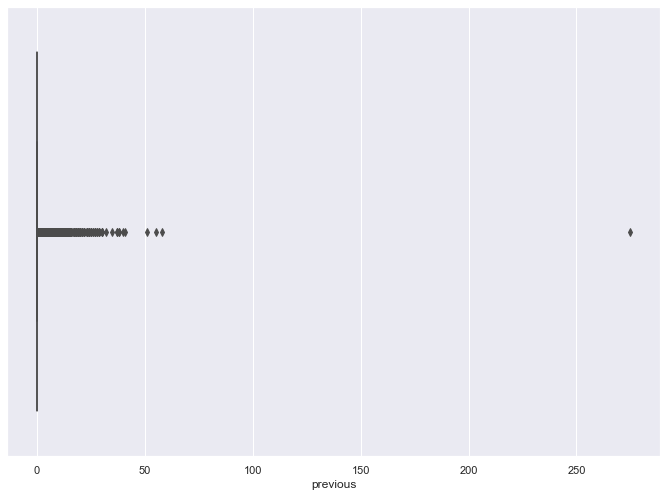

In [234]:
sns.boxplot(bankData['previous'])

In [236]:
previous_analysis.get_higher_outlier_rows()

age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
24060  telephone   21   oct        39         1    151         3  failure   
24062  telephone   21   oct       519         1    166         1    other   
24064  telephone   21   oct       144         1     91         4  failure   
24072  telephone   22   oct        73         1     86         4    other   
24077  telephone   23   oct       140         1    143         3  failure   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45199   cellular   16   nov      1166         3    530        12    other   
45201   cellular   17   nov       226         1    184         4  success   
45204   cellular   17   nov       300         1     40         8  failure   
45208   cellular   17   nov      1127         5    184         3  success   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
24060     no  
24062    yes  
24064    yes  
24072     no  
24077    yes  
...      ...  
45199     no  
45201    yes  
45204    yes  
45208    yes  
45210     no  

[8257 rows x 17 columns]

In [235]:
previous_analysis.get_lower_outlier_rows()

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []

### Poutcome
* meaning - Whether or not the campaign for the client was successful (ie: did the customer convert to being a term deposit subscriber)
* analysis - I predic that this will be a very important variable when predicting the target since with the other column's information will give us a good insight on what type of customers are willing to be a term deposit subscriber
* missing values - hard to tell if 'unknown' and 'other' are missing values, we need more context on why we could classify a client other than fail/success
* outliers - categorial variable, so no outliers
* range - ['unknown', 'failure', 'other', 'success']

In [237]:
bankData['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

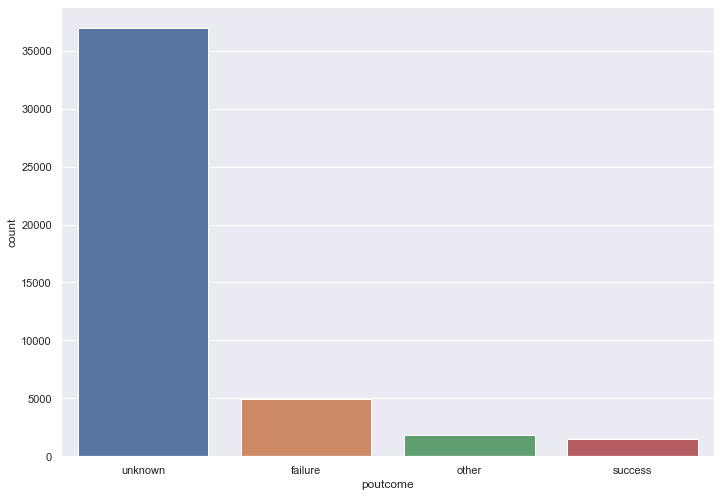

In [238]:
sns.countplot(x="poutcome", data=bankData)

In [153]:
bankData.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [154]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB
